# Preliminary analysis
This notebook contains the calculations for the basic statistics about the unprocessed cleaned datasets, used in the "Dataset description" section in the thesis.

## Euroleaks

In [1]:
import numpy as np
import pandas as pd
import re
import json

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/euroleaks/cleaned.csv')
df.head()

,speaker,speech,timestamp,date
0,jeroen dijsselbloem,… of your responses or questions. and can i fi...,1900-01-01 00:00:00,2015-02-24 00:00:00
1,speaker 2,"uh, yes, uh, thank you, jeroen. well, uh, comm...",1900-01-01 00:00:10,2015-02-24 00:00:00
2,michael noonan,michael noonan.,1900-01-01 00:01:27,2015-02-24 00:00:00
3,speaker 2,"uh, it is therefore regrettable that, uh-",1900-01-01 00:01:29,2015-02-24 00:00:00
4,speaker 2,"… that the letter by the minister does not, uh...",1900-01-01 00:01:37,2015-02-24 00:00:00


## word count by speaker

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # does tokenization under the hood; into words of at least 2 letters
X = vectorizer.fit_transform(df.speech)

df['wordcount'] = X.toarray().sum(axis=1)

wc_by_speaker = df.groupby('speaker')['wordcount'].sum()

In [4]:
X.shape

(1489, 4911)

In [5]:
len(df.speech)

1489

In [4]:
wc_by_speaker.describe(percentiles=[.25,.5,.75,.9,.95,.99])

count       59.000000
mean      1478.627119
std       3734.749763
min          5.000000
25%        149.500000
50%        388.000000
75%       1310.500000
90%       3054.000000
95%       3729.400000
99%      19392.340000
max      23990.000000
Name: wordcount, dtype: float64

In [5]:
wc_by_speaker

speaker
alexander stubb            2039
benoît cœuré               3621
christine lagarde          3259
declan costello             817
dušan mramor                159
edward scicluna             795
hans jörg schelling         445
harris georgiades           436
irina                        23
jeroen dijsselbloem       16063
johan van overtveldt        117
jānis reirs                 164
kian                        141
klaus regling               525
luca antonio ricci          294
luis de guindos            3013
luis pierre                 560
male                        388
marco buti                 1983
maria luís albuquerque      510
mario draghi               1981
martin                       73
michael noonan             2025
michel sapin                545
nabil                        78
nikos theocarakis          2350
peter kažimír               334
pier carlo padoan          1091
pierre moscovici           3218
poul mathias thomsen       2403
rimantas šadžius           1632


In [6]:
print(f'There are {wc_by_speaker.sum()} total words in Euroleaks after preparing the text.')

unkown_names = [
    'irina',
    'nabil',
    'tropa',
    'martin',
    'kian',
    'male'
]

is_named = wc_by_speaker.index.to_series().apply(lambda s: 'speaker' not in s and s not in unkown_names).to_numpy()
print(f'Of those, {wc_by_speaker[np.invert(is_named)].sum()} ({np.around(wc_by_speaker[np.invert(is_named)].sum()/wc_by_speaker.sum()*100,2)} %) belong to unidentified speakers.')

There are 87239 total words in Euroleaks after preparing the text.
Of those, 5636 (6.46 %) belong to unidentified speakers.


### all speakers

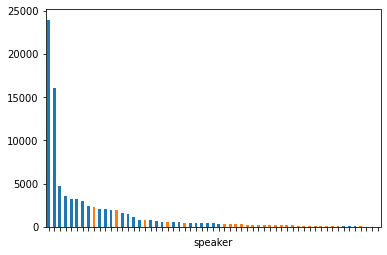

In [7]:
is_named = wc_by_speaker.index.to_series().apply(lambda s: 'speaker' not in s and s not in unkown_names).to_numpy()

cmap = np.array([u'#ff7f0e', u'#1f77b4'])

color = cmap[is_named.astype(int)]

ax = wc_by_speaker.sort_values(ascending=False).plot.bar(color=color)
labels = ax.set_xticklabels([])

### identified speakers

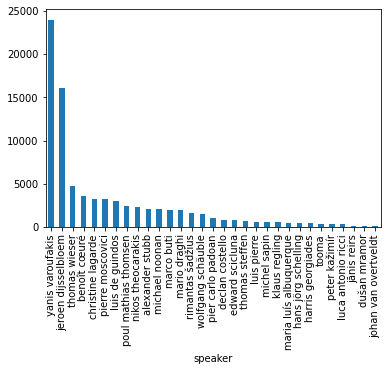

In [8]:
ax = wc_by_speaker[is_named].sort_values(ascending=False).plot.bar()

### unidentified speakers

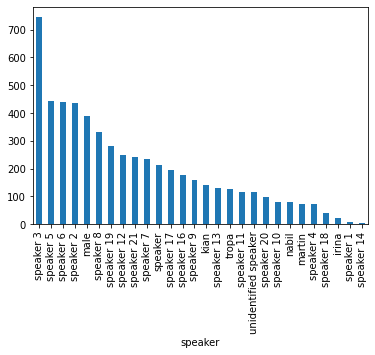

In [9]:
ax = wc_by_speaker[np.invert(is_named)].sort_values(ascending=False).plot.bar()

### proportion of unnamed speakers

In [10]:
percent_unnamed = np.round(wc_by_speaker[np.invert(is_named)].sum() / wc_by_speaker.sum() * 100, 2)

print(f'{percent_unnamed} % of words belong to unnamed speakers.')

6.46 % of words belong to unnamed speakers.


### joint plot for the appendix (identified + unidentified speakers)

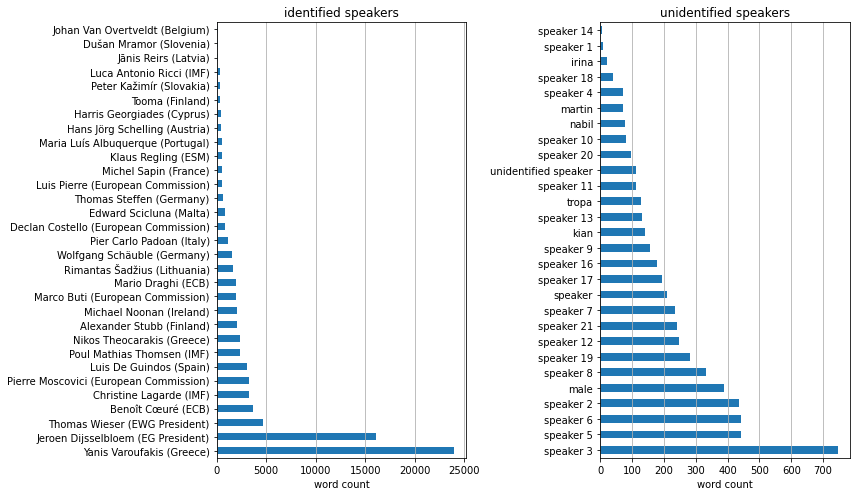

In [11]:
with open('../data/euroleaks/name_to_entity.json', 'r') as f:
    speaker_to_entity = json.load(f)

fig, axes = plt.subplots(1,2, figsize=(12,7))

wc_by_speaker[is_named].sort_values(ascending=False).plot.barh(ax=axes[0])
axes[0].set_xlabel('word count')
axes[0].set_ylabel('')
axes[0].grid(axis='x')
axes[0].set_title('identified speakers')

labels = pd.Series([t.get_text() for t in axes[0].get_yticklabels()]).apply(lambda s: 
        f'{s.title()} ({speaker_to_entity[s] if s in speaker_to_entity.keys() else "Unkown"})')

axes[0].set_yticklabels(labels)


wc_by_speaker[np.invert(is_named)].sort_values(ascending=False).plot.barh(ax=axes[1])
#axes[1].set_xlabel('unidentified speaker')
axes[1].set_xlabel('word count')
axes[1].set_ylabel('')
axes[1].grid(axis='x')
axes[1].set_title('unidentified speakers')

fig.tight_layout()

plt.savefig('../figures/wc-by-speaker-all.png')

In [12]:
df.drop(columns=['timestamp'], inplace=True)
df.head()

,speaker,speech,date,wordcount
0,jeroen dijsselbloem,… of your responses or questions. and can i fi...,2015-02-24 00:00:00,19
1,speaker 2,"uh, yes, uh, thank you, jeroen. well, uh, comm...",2015-02-24 00:00:00,169
2,michael noonan,michael noonan.,2015-02-24 00:00:00,2
3,speaker 2,"uh, it is therefore regrettable that, uh-",2015-02-24 00:00:00,7
4,speaker 2,"… that the letter by the minister does not, uh...",2015-02-24 00:00:00,154


In [13]:
df['identified'] = df.speaker.apply(lambda s: 'speaker' not in s and s not in unkown_names).to_numpy()

In [14]:
amendment = np.logical_and(
    np.logical_or(df.speaker == 'pierre moscovici', df.speaker == 'benoît cœuré'), 
    df.date == '2015-05-11 00:00:00')

In [15]:
wc_by_speaker.sum()

87239

<ipython-input-16-2e47391791a5>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_yticklabels(ax.get_yticks(), fontsize=16)


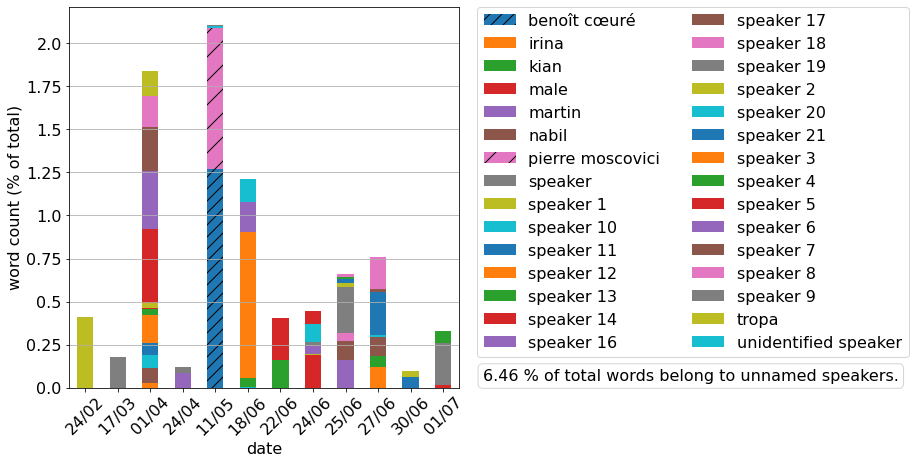

In [16]:
fig, ax = plt.subplots(figsize=(7,7))

speakers = df.speaker[np.logical_or(df.identified == False, amendment)].unique()
speakers.sort()

dates = pd.Series(df.date.unique()).apply(lambda s: pd.to_datetime(s).strftime('%d/%m'))

df_to_plot = df[np.logical_or(df.identified == False, amendment)]\
                .groupby(['date', 'speaker'])\
                .sum()\
                .wordcount\
                .unstack() / wc_by_speaker.sum() * 100

df_to_plot.plot(kind='bar', 
                stacked=True, 
                ax=ax,
                legend=False)


# mark the two bars for identified speakers
bars = ax.patches
for annotate, pattern in zip(['pierre moscovici', 'benoît cœuré'], ['/', '//']):
    ix = np.where(speakers == annotate)[0][0] * dates.size
    for bar in bars[ix:(ix+dates.size)]:
        bar.set_hatch(pattern)

# add legend
lgd = ax.legend(loc='upper right', bbox_to_anchor= (2.15, 1), ncol=2,
            borderaxespad=0, frameon=True, fontsize=16)

# add text box
textstr = f'{percent_unnamed} % of total words belong to unnamed speakers.'
props = dict(boxstyle='round', facecolor='white', edgecolor='.8', alpha=.8)
ax.text(1.06, 0.05, textstr, transform=ax.transAxes, fontsize=16,
       verticalalignment='top', bbox=props)


_ = ax.set_xticklabels(dates, rotation=45, fontsize=16)
_ = ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.set_xlabel('date', fontsize=16)
ax.set_ylabel('word count (% of total)', fontsize=16)

ax.grid(axis='y')

plt.savefig('../figures/unidentified-sepaker-date.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [17]:
n = 300

var = np.sum(df[np.logical_or(df.identified == False, amendment)]\
    .groupby(["date", "speaker"])\
    .sum()\
    .wordcount > n)

print(f'Of the remaining unidentified speakers, only {var} have more than {n} words.')

Of the remaining unidentified speakers, only 5 have more than 300 words.


In [18]:
#labels = [t.get_text() for t in ax.get_legend().get_texts()]

### word count by entity

In [30]:
with open('../data/euroleaks/name_to_entity.json', 'r') as f:
    speaker_to_entity = json.load(f)

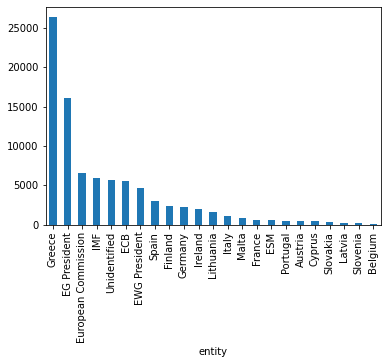

In [31]:
# add column for entity, label unassigned as Unidentified
df['entity'] = df.speaker.apply(lambda s: speaker_to_entity[s] if s in speaker_to_entity.keys() else 'Unidentified')

wc_by_entity = df.groupby('entity')['wordcount'].sum()

_ = wc_by_entity.sort_values(ascending=False).plot.bar()

#### group institutions together

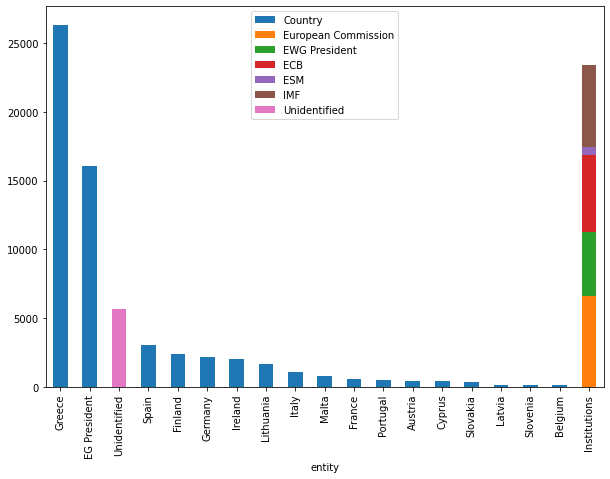

In [32]:
wcent = pd.DataFrame({
    'total': wc_by_entity,
    'Country': wc_by_entity,
    'European Commission': np.zeros(wc_by_entity.size, dtype=int),
    'EWG President': np.zeros(wc_by_entity.size, dtype=int),
    'ECB': np.zeros(wc_by_entity.size, dtype=int),
    'ESM': np.zeros(wc_by_entity.size, dtype=int),
    'IMF': np.zeros(wc_by_entity.size, dtype=int),
    'Unidentified': np.zeros(wc_by_entity.size, dtype=int)
})

wcent.loc['Institutions'] = np.array([
    0,
    0,
    wc_by_entity.loc['European Commission'],
    wc_by_entity.loc['EWG President'],
    wc_by_entity.loc['ECB'],
    wc_by_entity.loc['ESM'],
    wc_by_entity.loc['IMF'],
    0
])

wcent['Country'][(wcent.index.to_numpy() == 'EWG President') | (wcent.index.to_numpy() == 'ECB') | (wcent.index.to_numpy() == 'ESM') |(wcent.index.to_numpy() == 'IMF') | (wcent.index.to_numpy() == 'European Commission') | (wcent.index.to_numpy() == 'Unidentified')] = 0

wcent['Unidentified'].iloc[-2] = wcent['total'].iloc[-2]
wcent['Country'].iloc[-2] = 0

_ = wcent.sort_values(by='total', ascending=False).drop(columns=['total'], index=['European Commission', 'EWG President', 'ECB', 'ESM', 'IMF']).plot.bar(stacked=True, figsize=(10,7))

Same as above but values as fractions.

In [33]:
# add Netherlands to EG president
wcent.index = wcent.index.to_series().apply(lambda s: 'EGP / Netherlands' if s=='EG President' else s)

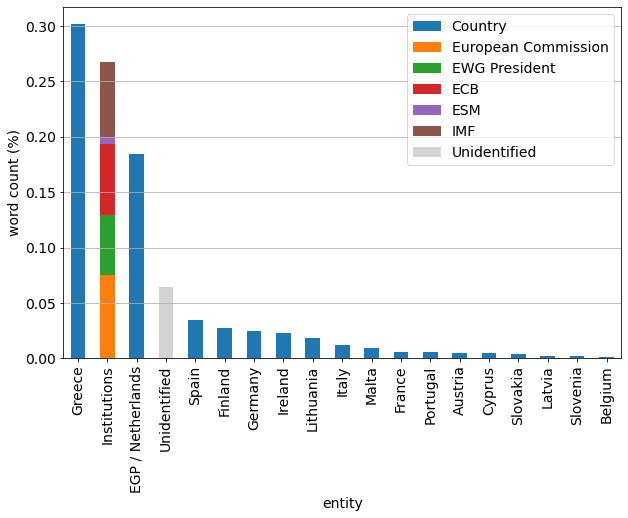

In [34]:
plt.rcParams.update({'font.size': 14})

# sort descendingly
df_to_plot = wcent.sort_values(by='total', ascending=False).drop(columns=['total'], index=['European Commission', 'EWG President', 'ECB', 'ESM', 'IMF'])

# make fractions
df_to_plot /= np.repeat(df_to_plot.sum().sum(), df_to_plot.shape[0]*df_to_plot.shape[1]).reshape(df_to_plot.shape)

# reorder and plot bars
ax = df_to_plot.iloc[[0,-1,]+list(range(1,18))].plot.bar(stacked=True, 
                                                         figsize=(10,8),
                                                         color=[f'C{i}' for i in range(6)] + ['lightgrey'])

# hatches
#bars = ax.patches
#bars[2].set_hatch('/')

ax.set_ylabel('word count (%)')
ax.grid(axis='y')
#ax.set_title('Wordcount by entity')
xticks = ax.set_xticklabels(df_to_plot.index.to_series().iloc[[0,-1,]+list(range(1,18))], rotation=90)
#xticks[2] = 'EG President'
#_ = ax.set_xticklabels(xticks)
ax.set_xlabel('entity')

plt.subplots_adjust(bottom=0.27) # so that xticklabels are not cut off
plt.savefig('../figures/wordcount_by_entity.png')

For how much do Greece + EG President + Institutions alone account for?

In [ ]:
interest = [
    'ECB',
    'EG President',
    'ESM',
    'EWG President',
    'European Commission',
    'Greece',
    'IMF'
]

var = wc_by_entity[wc_by_entity.index.to_series().apply(lambda s: s in interest)].sum() / wc_by_entity.sum()
print(f'Greece, EG President and Institutions account for {np.around(var*100,2)} % of the total wordcount.')

### heatmap for how much each speaker speaks over time

In [ ]:
# speakers of bottom 25% by least-said
insignificant_speakers = wc_by_speaker.index[wc_by_speaker < 160].to_numpy()

In [ ]:
np.percentile(wc_by_speaker, 25)

In [ ]:
insignificant_speakers

In [ ]:
X = df[df.speaker.apply(lambda s: 
                        s not in insignificant_speakers and 
                        'speaker' not in s and
                        s != 'male'
                       )]\
    .groupby(['date','speaker'])['wordcount']\
    .sum().unstack().fillna(0).T

In [ ]:
X.columns = X.columns.to_series().apply(lambda s: pd.to_datetime(s).strftime('%d/%m'))

In [ ]:
# don't do this because then you could barely see the rest in the plot
#X['total'] = X.sum(axis=1)

In [ ]:
X.head()

In [ ]:
#X = X.drop(index=['yanis varoufakis', 'jeroen dijsselbloem', 'thomas wieser'])

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,12), sharey=True)

cmap = 'Blues'

##############
### axis 0 ###
##############

# plot
axes[0].matshow(X, cmap=cmap)

# xticks
dates = X.columns.to_numpy()
_ = axes[0].set_xticks(range(len(dates)))
_ = axes[0].set_xticklabels(dates, rotation=45)
# yticks
_ = axes[0].set_yticks(range(X.index.size))
_ = axes[0].set_yticklabels(X.index.to_series().apply(lambda s: 
        f'{s.title()} ({speaker_to_entity[s] if s in speaker_to_entity.keys() else "Unkown"})'))

# grids
axes[0].set_xticks(np.arange(-.53, len(dates), 1), minor=True)
axes[0].set_yticks(np.arange(X.index.size))
axes[0].set_yticks(np.arange(-.53, X.index.size, 1), minor=True)
axes[0].grid(which='minor', color='black', linestyle='-', linewidth=.5, alpha=.4)

# values
for (i,j),z in np.ndenumerate(X.to_numpy()):
    axes[0].text(j, i, int(z), ha='center', va='center', fontsize='small')
    
axes[0].set_title('A')

##############
### axis 1 ###
##############

# plot
axes[1].matshow(X.sum(axis=1).to_numpy().reshape(-1,1), cmap=cmap)

# xticks
_ = axes[1].set_xticks([0])
_ = axes[1].set_xticklabels(['\ntotal'], rotation='horizontal')
# yticks
_ = axes[1].set_yticks(range(X.index.size))


# values
for i,z in enumerate(X.sum(axis=1).to_numpy()):
    axes[1].text(0, i, int(z), ha='center', va='center', fontsize='small')
    
axes[1].set_title('B')

fig.tight_layout()

#fig.subplots_adjust(wspace=0.001)
    
fig.savefig('../figures/wordcount_heatmap.png')

## Communiques

In [2]:
df = pd.read_csv('../data/communiques/cleaned.csv')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # does tokenization under the hood
X = vectorizer.fit_transform(df.story)

df['wordcount'] = X.toarray().sum(axis=1)

In [4]:
df.head()

,date,title,story,wordcount
0,2015-02-12,remarks by jeroen dijsselbloem at the press co...,"good evening. today, as you well know, we had ...",202
1,2015-02-16,remarks by jeroen dijsselbloem at the press co...,good evening everyone and thanks for joining t...,1301
2,2015-02-20,eurogroup statement on greece,the eurogroup reiterates its appreciation for ...,683
3,2015-02-20,remarks by jeroen dijsselbloem at the press co...,good evening and welcome to this press confere...,1039
4,2015-02-24,eurogroup statement on greece,the eurogroup today discussed the first list o...,140


In [5]:
df.wordcount.describe()

count      18.00000
mean      473.00000
std       402.57524
min        48.00000
25%       163.00000
50%       267.50000
75%       854.00000
max      1301.00000
Name: wordcount, dtype: float64

In [6]:
print(f'There are {df.wordcount.sum()} total words in Communiques after preparing the text.')

There are 8514 total words in Communiques after preparing the text.


In [7]:
print(f'The shortest document has {np.min(df.wordcount)} words, it is:\n{df.date[np.argmin(df.wordcount)]}: {df.title[np.argmin(df.wordcount)]}')

The shortest document has 48 words, it is:
2015-06-24: exit doorstep remarks by jeroen dijsselbloem following the eurogroup meeting of 24 june 2015


In [8]:
print(f'The longest document has {np.max(df.wordcount)} words, it is:\n{df.date[np.argmax(df.wordcount)]}: {df.title[np.argmax(df.wordcount)]}')

The longest document has 1301 words, it is:
2015-02-16: remarks by jeroen dijsselbloem at the press conference following the eurogroup meeting of 16 february 2015
